<div align="center">
  <img src="https://raw.githubusercontent.com/lapalap/dora/6991c4a08f27e4171e3a9b0bdffc0a14966e07df/assets/images/logo.svg" width="350"/>
</div>

<div align="center"><h1>DORA: Data-agnOstic Representation Analysis</h1>
<h5>A toolkit to explore the Representation Spaces of Deep Neural Networks</h5>

In [ ]:
!pip install https://github.com/lapalap/dora/archive/refs/heads/dev.zip --quiet

In [3]:
## if the cell below throws this error then just re-run the cell
## FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/scipy-1.4.1.dist-info/METADATA' 

from dora import Dora
from dora.objectives import ChannelObjective

import torch
import torchvision.models as models
import torchvision.transforms as transforms

## 🔧 Set up a pre-trained model
Dora also supports your own custom models, but for this example we'll stick to a pre-trained one

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True).eval().to(device)
my_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## 🧙Initiate DORA and select the neurons you'd want to investigate

In [5]:
d = Dora(model=model, image_transforms=my_transforms, device = device)

neuron_indices = [i for i in range(100, 200)]

## ⚡ Generate s-AMS
i.e Synthetic Activation Maximization Signals

In [6]:
d.generate_signals(
    neuron_idx=neuron_indices,
    layer=model.avgpool,
    objective_fn=ChannelObjective(),
    width=224,
    height=224,
    iters=80,
    experiment_name="model.avgpool",
    progress = True,
    lr = 18e-3,
    overwrite_experiment=True,  ## will still use what already exists if generation params are same
)

Subfolder for sAMS created at .dora/sAMS
Experiment name: model.avgpool


Generating s-AMS: 100%|██████████| 100/100 [01:54<00:00,  1.15s/it]


# 🔬Collect Encodings of s-AMS

In [7]:
d.collect_encodings(
    layer=model.avgpool,
    neuron_idx = neuron_indices, 
    experiment_name="model.avgpool"
)

# 🔎 Run Outlier Detection

In [8]:
result = d.run_outlier_detection(
    neuron_idx=neuron_indices,
    experiment_name="model.avgpool", 
    method="PCA"
)

# ✨ Run the interactive visualizer

In [9]:
## might take some time to load
result.visualize(notebook_mode = True)

<IPython.core.display.Javascript object>

# ⚒ Other useful utils

## Accessing outlier and normal neurons for a closer look

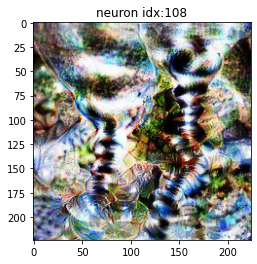

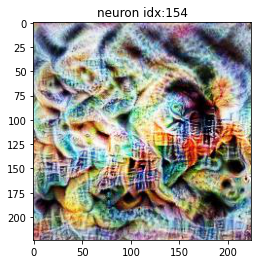

In [25]:
import matplotlib.pyplot as plt
outlier_neurons = result.get_outlier_neurons()

for value in outlier_neurons[:2]:
    plt.imshow(value['image'])
    plt.title(f"neuron idx:{value['neuron_idx']}")
    plt.show()

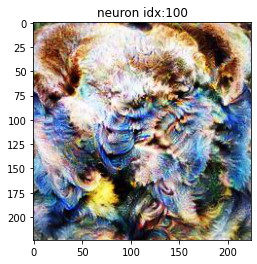

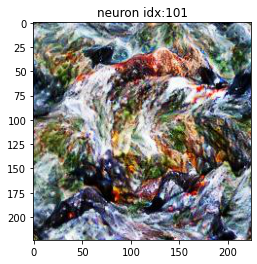

In [26]:
import matplotlib.pyplot as plt
normal_neurons = result.get_normal_neurons()

for value in normal_neurons[:2]:
    plt.imshow(value['image'])
    plt.title(f"neuron idx:{value['neuron_idx']}")
    plt.show()

You can also access the neurons in sequence of `neuron_idx` like this:

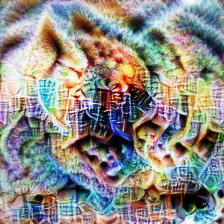

In [ ]:
result.neurons[54]